In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FixedLocator
import numpy as np

In [13]:
#Loading in the datasets created in notebook 1
Dataset_1 = pd.read_csv("Data/Top_20_tracks.csv")
Dataset_2 = pd.read_csv("Data/Top_song_features.csv")
Dataset_3 = pd.read_csv("Data/Top_genres.csv")

In [14]:
#Merging Dataset_1 and Dataset_2 to combine 'track_title' and features
merged_data = pd.merge(Dataset_2, Dataset_1[['uri', 'track_title']], on='uri', suffixes=('_left', '_right'))

NameError: name 'mpatches' is not defined

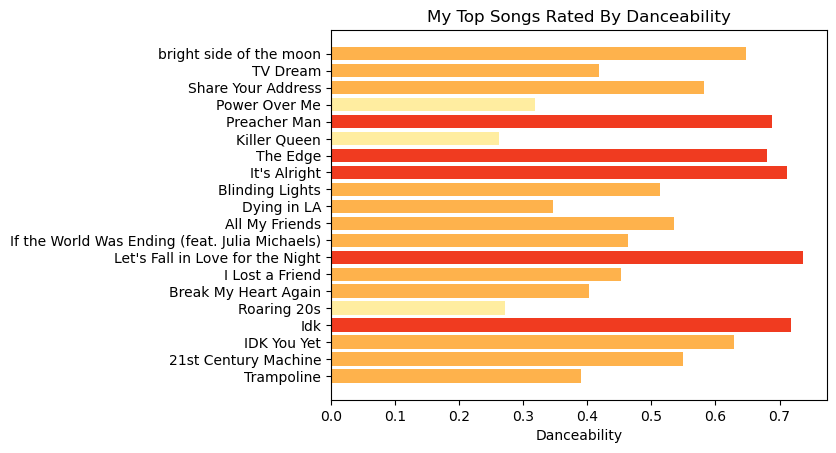

In [15]:
#I want to see how my top 20 songs are rated on the feature 'danceability'
#I start by defining the boundaries and colors for each danceability level
danceability_bins = [0, 0.33, 0.66, 1.0]
danceability_labels = ["low", "medium", "high"]
danceability_colors = ["#ffeda0", "#feb24c", "#f03b20"]

# applying the cut function to create a new column with danceability levels
merged_data["danceability_level"] = pd.cut(merged_data["danceability"], bins=danceability_bins, labels=danceability_labels)

# Creating a dictionary that maps each danceability level to its corresponding color in the palette
color_dict = dict(zip(danceability_labels, danceability_colors))

# Creating a ListedColormap from the color dictionary
cmap = ListedColormap([color_dict[x] for x in danceability_labels])

# Creating a list of colors that correspond to each danceability level
danceability_colors = [color_dict[x] for x in danceability_labels]

# Plot horizontal bar chart
plt.barh(merged_data['track_title'], merged_data['danceability'], color = [color_dict[x] for x in merged_data['danceability_level']])

# Adding labels and title to the plot
plt.xlabel("Danceability")
plt.title("My Top Songs Rated By Danceability")
plt.gca().invert_yaxis()
plt.grid(False, axis = 'y') # turn off horizontal grid
plt.grid(False, axis = 'x') # turn off vertical grid

# Adding legend to the plot
legend_handles = [mpatches.Patch(color=color_dict[x], label = x) for x in danceability_labels]
plt.legend(handles = legend_handles, bbox_to_anchor = (0.57, 1.20), ncol = 3, fancybox = True, shadow=True)



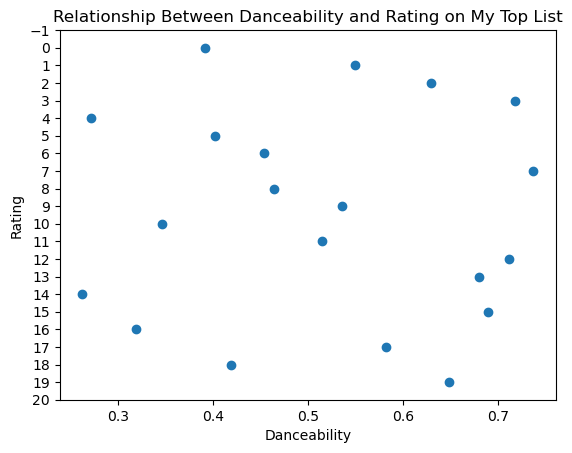

In [16]:
#I want to further analyze the relationship between 'danceability' and rating of the song on my top list
# Creating a scatterplot with danceability on x-axis and reversed ranging on y-axis
plt.scatter(merged_data['danceability'], merged_data['Unnamed: 0'][::-1])

# Reversing the y-axis
plt.gca().invert_yaxis()

# Add axis labels and title
plt.xlabel('Danceability')
plt.ylabel('Rating')
plt.title('Relationship Between Danceability and Rating on My Top List')
plt.yticks(range(-1, 21))
plt.grid(False, axis = 'y') # turn off horizontal grid
plt.grid(False, axis = 'x') # turn off vertical grid

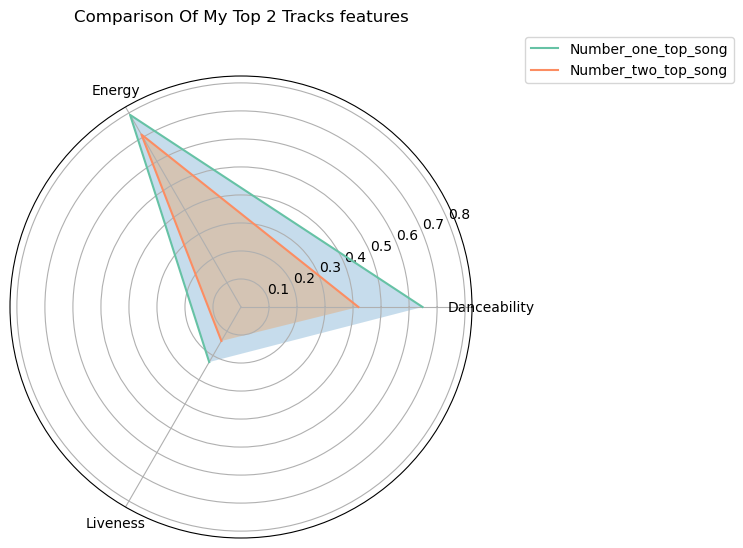

In [20]:
#I now want to compare the features danceability, energy and liveness of my top two songs
#I start by extracting the relevant data from the 'merged_data' dataset
Number_one_top_song = merged_data.loc[merged_data['track_title'] == 'bright side of the moon', ['danceability', 'energy', 'liveness']].values
Number_two_top_song = merged_data.loc[merged_data['track_title'] == 'TV Dream', ['danceability', 'energy', 'liveness']].values

# Extracting the feature values for song 1 and song 2
danceability1, energy1, liveness1, = Number_one_top_song[0]
danceability2, energy2, liveness2, = Number_two_top_song[0]

# Defining the features and their values for the two songs
features = ['Danceability', 'Energy', 'Liveness',]
values_song1 = [danceability1, energy1, liveness1,]
values_song2 = [danceability2, energy2, liveness2,]

# Creating a radar chart to visualize the values
fig, ax = plt.subplots(figsize = (6, 6), subplot_kw = dict(polar = True))
theta = np.linspace(0, 2*np.pi, len(features), endpoint = False)
ax.plot(theta, values_song1, label = 'Number_one_top_song', color = "#66c2a5")
ax.fill(theta, values_song1, alpha = 0.25)
ax.plot(theta, values_song2, label = 'Number_two_top_song', color = "#fc8d62")
ax.fill(theta, values_song2, alpha = 0.25)
ax.set_xticks(theta)
ax.set_xticklabels(features)
plt.title('Comparison Of My Top 2 Tracks features', y = 1.1)
ax.legend(bbox_to_anchor = (1.1, 1.1), loc = 'upper left')


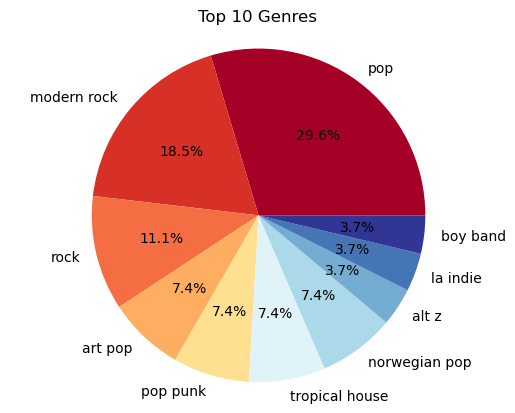

In [10]:
#Lastly, i want to find out which genres i listen to most using Dataset_3

#Creating colorblind palette
cb_palette = ["#a50026", "#d73027", "#f46d43", "#fdae61", "#fee090", "#e0f3f8", "#abd9e9", "#74add1", "#4575b4", "#313695"]

#Creating pie chart with 10 most litened to genres
plt.pie(Dataset_3['count'], labels = Dataset_3['genre'], autopct='%1.1f%%', colors = cb_palette)
plt.axis('equal')
plt.title('Top 10 Genres')
plt.show()